In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import lmfit

In [3]:
%load_ext autoreload
%autoreload 2

from DSTPolarimeterPlotLib import *
from script_to_run_on_kipsua import Main

In [4]:
dtor = 0.017453292519943295

---

# Fitting with Anan's Algorithm

In [5]:
pathData = "/nwork/kouui/dstsp/data/calibration/20171128/camera01/cal"
pathCamera01 = "/nwork/kouui/dstsp/data/calibration/20171128/camera01/cal"

In [6]:
main_scaled = Main(isDebug=False)
main_scaled.run(pathData, pathCamera01, threshold=129626, nCPU=1, isMap=False, isSigma=True)
del main_scaled.iquv
del main_scaled.iquv_mean

--- Preparing fitting process ---
--- Start fitting process ---
time used in fitting:  5.304004
Fitting iquv_mean complete.


In [7]:
lmfit.report_fit(main_scaled.result_Mean)

[[Fit Statistics]]
    # function evals   = 275
    # data points      = 297
    # variables        = 23
    chi-square         = 207.341
    reduced chi-square = 0.757
    Akaike info crit   = -60.732
    Bayesian info crit = 24.224
[[Variables]]
    xn:            -0.04589711 +/- 0.001155 (2.52%) (init=-0.0387)
    tn:            -0.21811995 +/- 0.021489 (9.85%) (init=-0.2932153)
    xc:            -0.00152421 +/- 0.000547 (35.89%) (init=-0.0321)
    tc:             0.53664914 +/- 0.018173 (3.39%) (init= 0.2181662)
    sc:             0.18598380 +/- 1.03e+04 (5563290.22%) (init= 0.0521)
    t_en:           0 (fixed)
    dlen:           0 (fixed)
    t_ex:           0 (fixed)
    dlex:           0 (fixed)
    th_dst_mmsp2:  -0.12236564 +/- 7.34e+03 (5994592.34%) (init= 0)
    th_mmsp2_hsp:  -1.35217674 +/- 6.14e+03 (454312.50%) (init=-0.7504916)
    par_mmsp2_0:    0 (fixed)
    par_mmsp2_1:    0 (fixed)
    par_mmsp2_2:    0 (fixed)
    par_mmsp2_3:    0 (fixed)
    par_mmsp2_4:    0

In [7]:
ha  = main_scaled.hd['ha']/3600.*15.*dtor
key = main_scaled.key.astype(np.int16)

In [8]:
tol = np.array([
    [0     , 0.333, 0.333, 0.250],
    [0.0003, 0.050, 0.007, 0.005],
    [0.0003, 0.007, 0.050, 0.005],
    [0.0003, 0.050, 0.007, 0.050],
])

In [9]:
temp = main_scaled.result_Mean.residual*main_scaled.sigma

In [16]:
temp.argmax(), temp.argmin()

(239, 41)

In [15]:
key[239], temp[239], key[41], temp[41]

(8, 0.065786025711271956, 6, -0.078525116705180142)

bad data : **41**, 140, 239

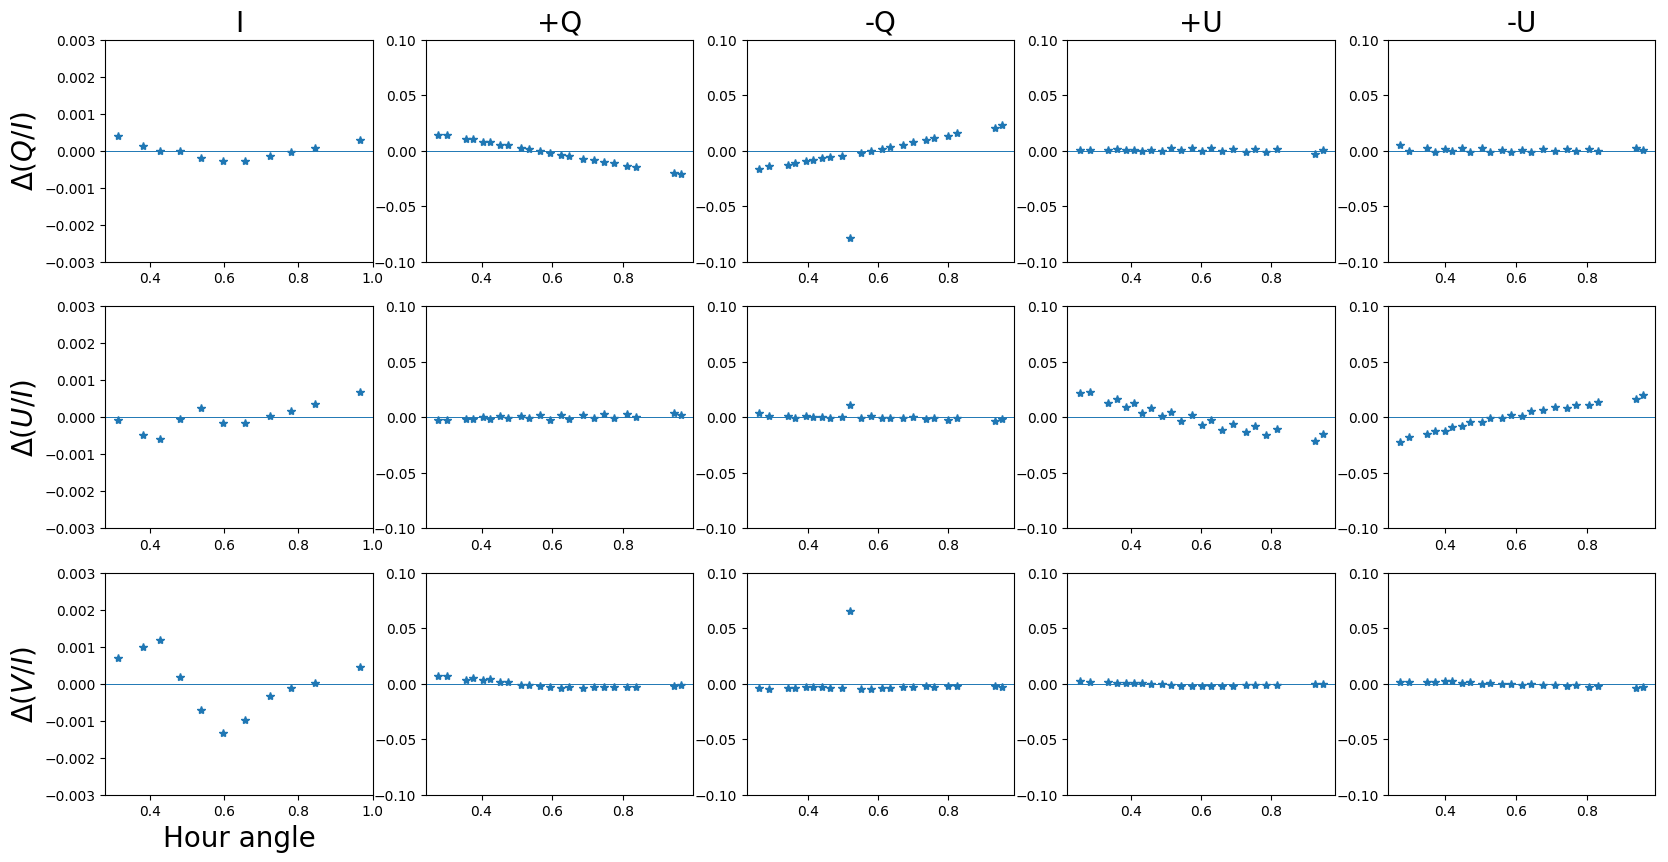

In [8]:
plotResidual(main_scaled.result_Mean.residual*main_scaled.sigma, ha, key, ylim_I=0.003)

In [11]:
main_scaled.result_Mean.covar

array([[  1.33574556e-06,  -2.13063885e-06,   3.76190365e-07,
         -9.30073153e-06,   5.04031665e-01,  -4.70123194e-01,
         -3.15519228e-01,   3.64091081e-02,  -3.36170639e-02,
         -7.43551786e-03,   1.38328160e-02,   6.32060574e-01,
          3.65957430e-01,   3.58109560e-01,  -2.47805131e-03,
         -2.58932748e-02,   2.27911676e-01,   4.97394609e-01,
          3.13809651e-02,   3.40992370e-01,  -8.57035315e-01,
          2.49875752e-01,  -4.57315934e-06],
       [ -2.13219507e-06,   4.61806676e-04,   1.88499212e-06,
          3.22626415e-04,   2.54447302e+01,  -2.74005485e+00,
         -7.09076217e+00,   4.20307345e-01,  -6.30500921e-01,
         -4.77215758e-01,   1.95475143e-01,   1.77908342e+01,
         -1.19772178e+01,   1.10114054e+01,   2.78861579e-01,
         -8.01224374e+00,   7.49640753e+00,   2.29568863e+01,
          1.14326055e+00,  -1.30425490e+01,  -2.34247148e+01,
          1.09786015e+00,   1.03366487e-04],
       [  3.76113468e-07,   1.88356098e-06

In [ ]:
[
    [16,17,18,19],
    [20,21,22,23],
    [24,25,26,27],
    [28,29,30,31]
]

In [10]:
print(lmfit.fit_report(main_scaled.result_Mean.params))

[[Variables]]
    xn:            -0.04589711 +/- 0.001155 (2.52%) (init=-0.0387)
    tn:            -0.21811995 +/- 0.021489 (9.85%) (init=-0.2932153)
    xc:            -0.00152421 +/- 0.000547 (35.89%) (init=-0.0321)
    tc:             0.53664914 +/- 0.018173 (3.39%) (init= 0.2181662)
    sc:             0.18598380 +/- 1.03e+04 (5563290.22%) (init= 0.0521)
    t_en:           0 (fixed)
    dlen:           0 (fixed)
    t_ex:           0 (fixed)
    dlex:           0 (fixed)
    th_dst_mmsp2:  -0.12236564 +/- 7.34e+03 (5994592.34%) (init= 0)
    th_mmsp2_hsp:  -1.35217674 +/- 6.14e+03 (454312.50%) (init=-0.7504916)
    par_mmsp2_0:    0 (fixed)
    par_mmsp2_1:    0 (fixed)
    par_mmsp2_2:    0 (fixed)
    par_mmsp2_3:    0 (fixed)
    par_mmsp2_4:    0 (fixed)
    par_mmsp2_5:    0 (fixed)
    par_mmsp2_6:    0 (fixed)
    par_mmsp2_7:    0 (fixed)
    par_mmsp2_8:    0 (fixed)
    par_mmsp2_9:    0 (fixed)
    par_mmsp2_10:   0 (fixed)
    par_mmsp2_11:   0 (fixed)
    par_mmsp2_1

## whether fitting result is consistent with each other

In [13]:
scMap = np.zeros((19,7))
for i in range(19):
    for j in range(7):
        scMap[i,j] = main_scaled.result[i*7+j].params['sc'].value
scMap.max(), scMap.min(), scMap.mean(), scMap.std()

(0.62681758715831515,
 0.00021549009390608997,
 0.16179637674474179,
 0.12721729748995869)

In [20]:
for i in [4,16,6,23]:
    print("sc_{} : {}".format(i,main_scaled.result[i].params['sc'].value))

sc_4 : 0.6268175871583151
sc_16 : 0.00021549009390608997
sc_6 : 0.13777560999579574
sc_23 : 0.13542958489838225


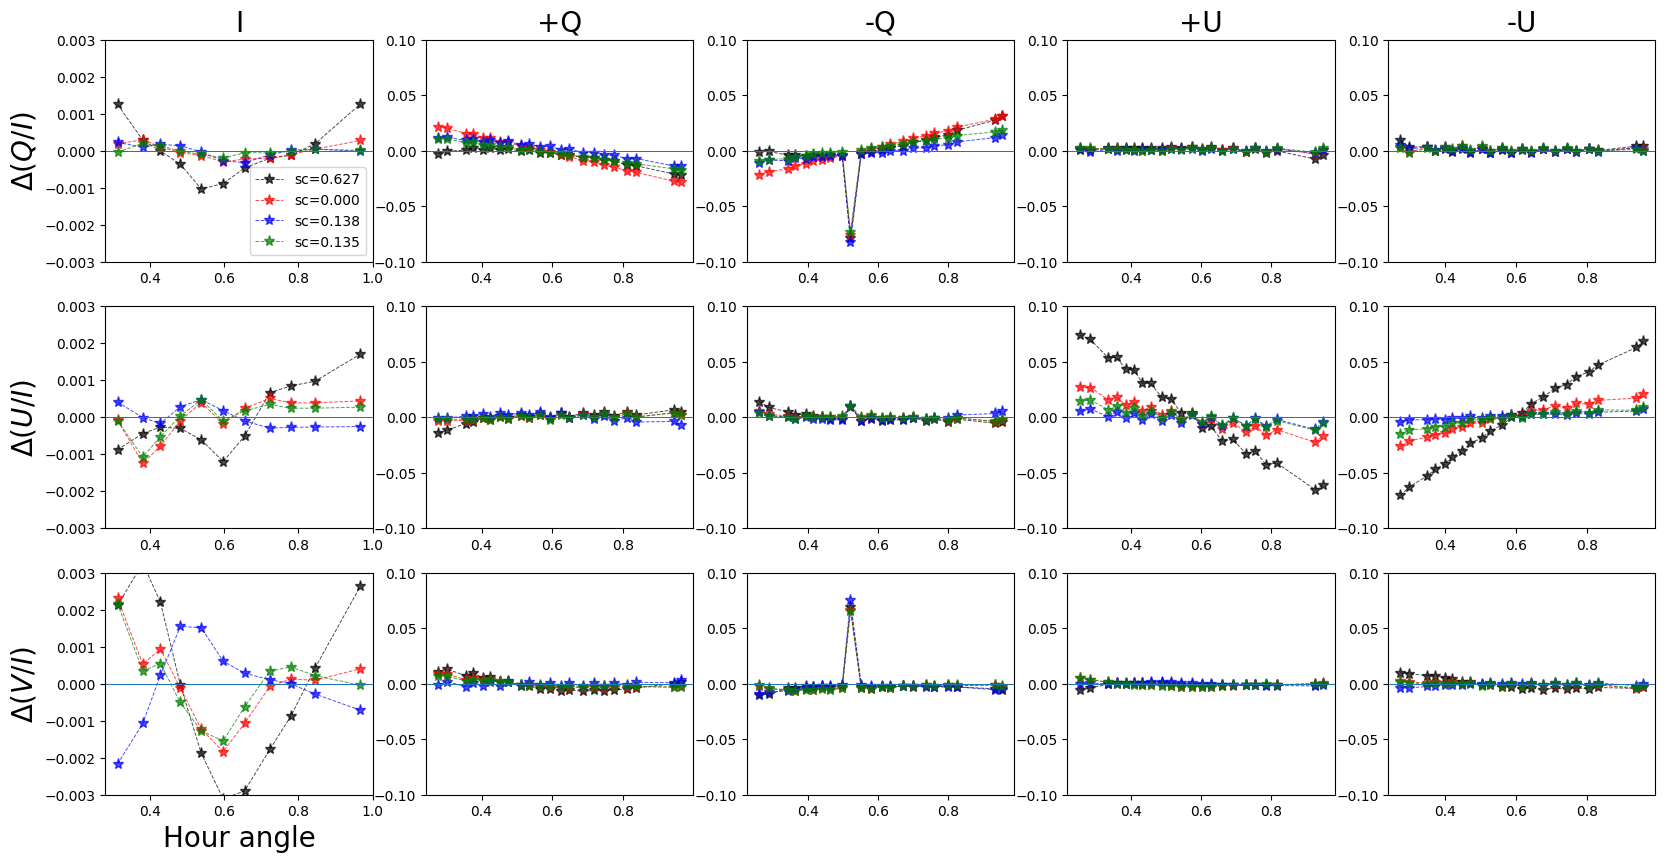

In [21]:
# 
nTime = ha.shape[0]

fig, axs = plt.subplots(3,5, figsize=(20,10), dpi=100)
FontSize = 20
ylim_I = 0.003

for n,c in zip([4,16,6,23],["k","r","b","g"]):
    dataDict = makeDataDict(key, nTime, main_scaled.result[n].residual*main_scaled.sigma, ha)
    for i,output in enumerate(["Q","U","V"]):
        for j,incident in enumerate(["I","+Q","-Q","+U","-U"]):

            ax = axs[i,j]
            data = dataDict[incident+"2"+output]
            if i==0 and j==0:
                ax.plot(data["ha"], data["data"], '--*'+c, alpha=0.7, linewidth=0.7, markersize=8, label="sc={0:1.3f}".format(main_scaled.result[n].params['sc'].value))
            else:
                ax.plot(data["ha"], data["data"], '--*'+c, alpha=0.7, linewidth=0.7, markersize=8)
            ax.axhline(y=0, linewidth=0.7)

            #--- title
            if i == 0:
                ax.set_title(incident, fontsize=FontSize)
            else:
                pass
            #--- ylabel
            if j == 0:
                ax.set_ylabel("$\Delta ({}/I)$".format(output), fontsize=FontSize)
            else:
                pass

            #--- xlabel
            if i == 2 and j == 0:
                ax.set_xlabel("Hour angle", fontsize=FontSize)
            else:
                pass

            #--- ylimit, fill_between
            if j == 0:
                ax.set_ylim(-ylim_I, ylim_I)
                #ax.fill_between(ha, -0.0003,0.0003, facecolor='gray', alpha=0.3, interpolate=True)
            else:
                ax.set_ylim(-0.1, 0.1)
                #ax.fill_between(ha, -0.001,0.001, facecolor='gray', alpha=0.3, interpolate=True)
axs[0,0].legend(loc='best');

1. green and blue has similar fitted "sc" but the fitting error looks different. 
2. green and red has totally different "sc" but the fitting error is very close to each other.

so, what does fitted "sc" mean ? what makes fitted "sc" change so dramatically in 2D-Map

# variance v.s. tolerance

## with sc

In [22]:
main_scaled.responseMatrixMap.shape

(99, 4, 4, 19, 7)

In [23]:
responseMatrixMapStandardized = np.zeros((99,4,4,19,7))
for i in range(4):
    for j in range(4):
        responseMatrixMapStandardized[:,i,j,:,:] = main_scaled.responseMatrixMap[:,i,j,:,:] / main_scaled.responseMatrixMap[:,0,0,:,:]

In [24]:
responseMatrixMapStandardizedStd = responseMatrixMapStandardized.std(axis=(3,4))

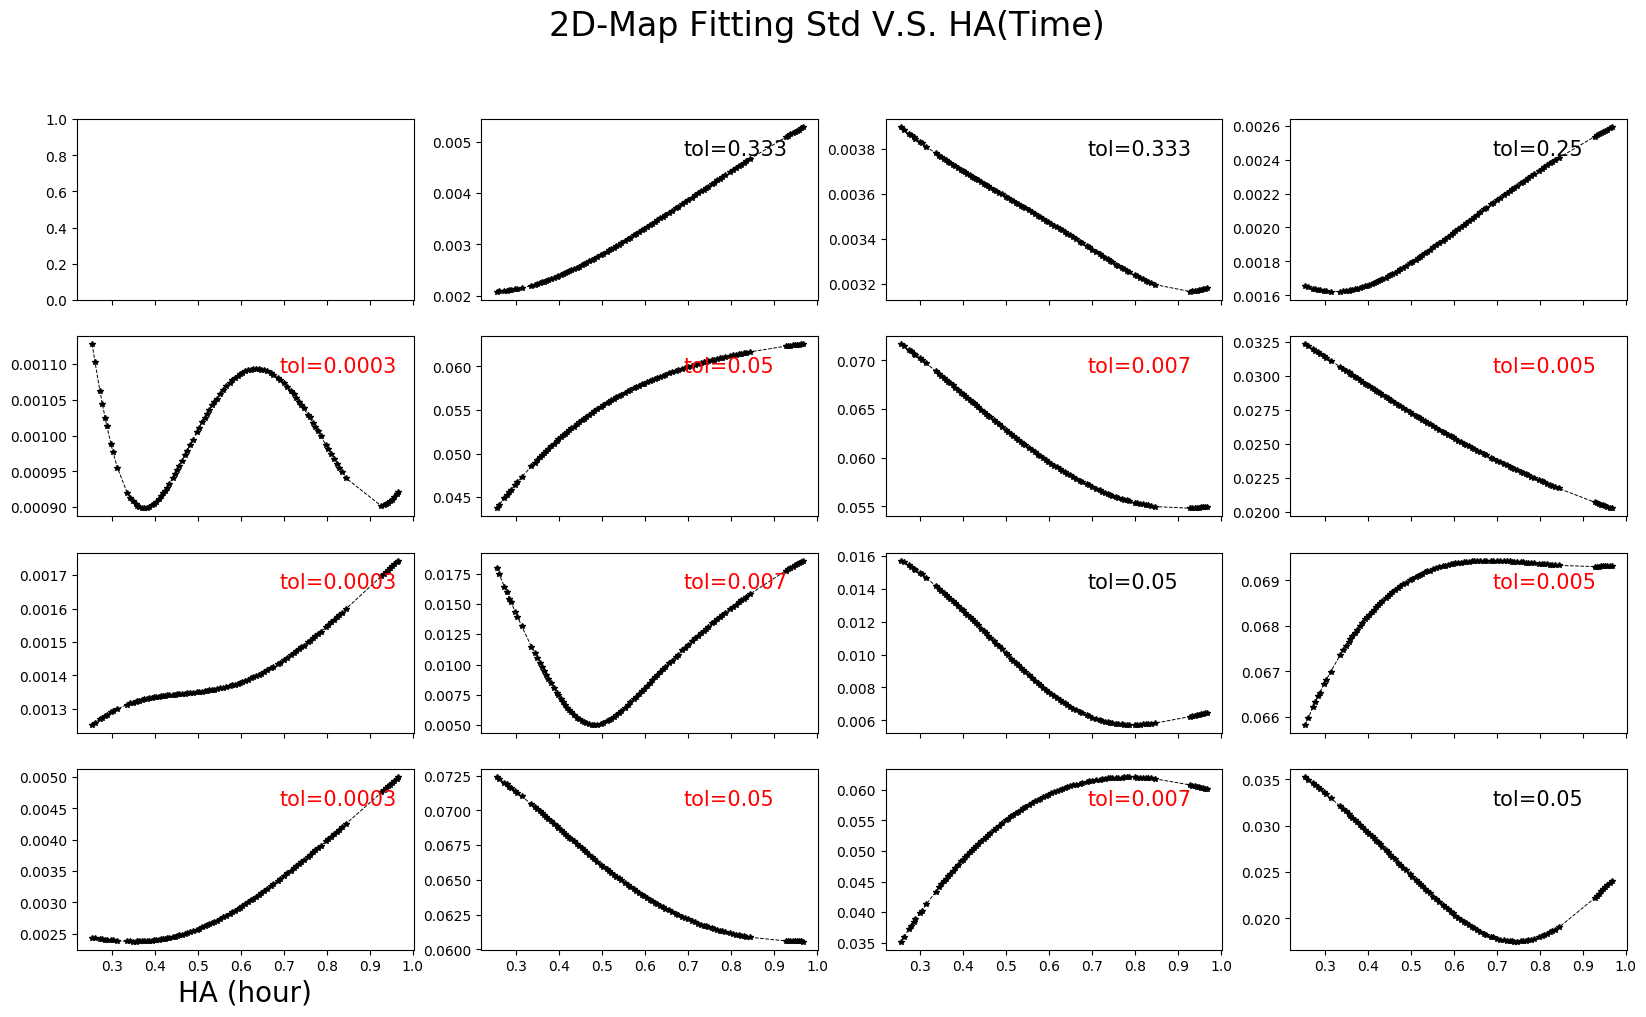

In [25]:
fig, axs = plt.subplots(4,4, figsize=(20,11), dpi=100, sharex=True)
for i in range(4):
    for j in range(4):
        if i==0 and j==0:
            continue
        ax = axs[i,j]
        ax.plot(ha, responseMatrixMapStandardizedStd[:,i,j], '--*k', linewidth=0.7, markersize=4)
        if responseMatrixMapStandardizedStd[:,i,j].max() < tol[i,j]:
            fc = 'black'
        else:
            fc = 'red'
        ax.text( 0.6, 0.8, 'tol={}'.format(tol[i,j]), transform=ax.transAxes, fontsize=15, color=fc)

axs[-1,0].set_xlabel("HA (hour)", fontsize=20)
fig.suptitle("2D-Map Fitting Std V.S. HA(Time)", fontsize=24);

## without sc

the first row in `main_scaled.responseMatrix` will become smaller then Std increase in row1~3 after standardization.

anyway let's take a look at parameter sc's 2D-Map

# 2D-Map of each fitting parameter

In [130]:
main_scaled.result_Mean.params.keys()

odict_keys(['xn', 'tn', 'xc', 'tc', 'sc', 't_en', 'dlen', 't_ex', 'dlex', 'th_dst_mmsp2', 'th_mmsp2_hsp', 'par_mmsp2_0', 'par_mmsp2_1', 'par_mmsp2_2', 'par_mmsp2_3', 'par_mmsp2_4', 'par_mmsp2_5', 'par_mmsp2_6', 'par_mmsp2_7', 'par_mmsp2_8', 'par_mmsp2_9', 'par_mmsp2_10', 'par_mmsp2_11', 'par_mmsp2_12', 'par_mmsp2_13', 'par_mmsp2_14', 'par_mmsp2_15', 'par_mmsp2_16', 'par_mmsp2_17', 'par_mmsp2_18', 'par_mmsp2_19', 'par_mmsp2_20', 'par_mmsp2_21', 'par_mmsp2_22', 'par_mmsp2_23', 'par_mmsp2_24', 'par_mmsp2_25', 'par_mmsp2_26', 'par_mmsp2_27', 'par_mmsp2_28', 'par_mmsp2_29', 'par_mmsp2_30', 'par_mmsp2_31', 'par_mmsp2_32', 'par_mmsp2_33', 'th_calunit'])

mean : 0.1617963767447418, std : 0.1272172974899587
initial value : 0.0521


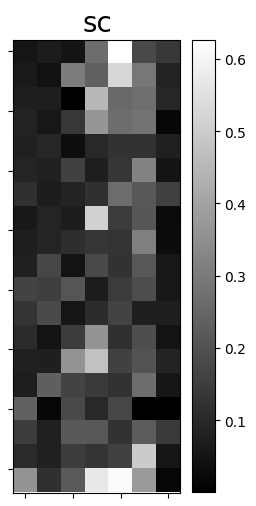

In [69]:
name = "sc"
parMap = np.zeros((19,7))
for i in range(19):
    for j in range(7):
        parMap[i,j] = main_scaled.result[i*7+j].params[name].value
fig, ax = plt.subplots(1,1,figsize=(3,6), dpi=100)
im = ax.imshow(parMap, cmap='gray')
plt.colorbar(im, ax=ax)
ax.set_title(name, fontsize=20)
ax.tick_params(labelleft = "off",labelbottom='off');

print("mean : {}, std : {}".format(parMap.mean(), parMap.std()))
print("initial value : {}".format(main_scaled.result_Mean.params[name].init_value))

mean : -0.045856713030805595, std : 0.003579535499380496
initial value : -0.0387


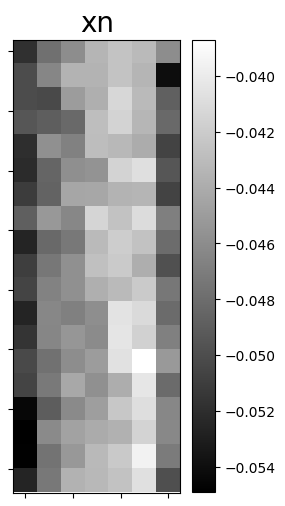

In [70]:
name = "xn"
parMap = np.zeros((19,7))
for i in range(19):
    for j in range(7):
        parMap[i,j] = main_scaled.result[i*7+j].params[name].value
fig, ax = plt.subplots(1,1,figsize=(3,6), dpi=100)
im = ax.imshow(parMap, cmap='gray')
plt.colorbar(im, ax=ax)
ax.set_title(name, fontsize=20)
ax.tick_params(labelleft = "off",labelbottom='off');

print("mean : {}, std : {}".format(parMap.mean(), parMap.std()))
print("initial value : {}".format(main_scaled.result_Mean.params[name].init_value))

mean : -11.342075913785248, std : 2.403746274352707
initial value : -16.8


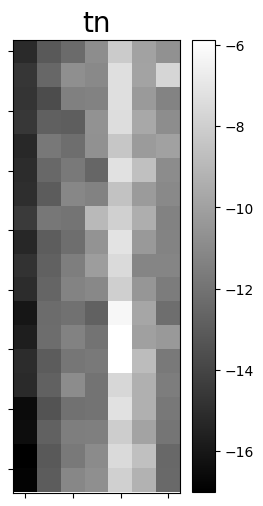

In [72]:
name = "tn"
parMap = np.zeros((19,7))
for i in range(19):
    for j in range(7):
        parMap[i,j] = np.rad2deg(main_scaled.result[i*7+j].params[name].value)
fig, ax = plt.subplots(1,1,figsize=(3,6), dpi=100)
im = ax.imshow(parMap, cmap='gray')
plt.colorbar(im, ax=ax)
ax.set_title(name, fontsize=20)
ax.tick_params(labelleft = "off",labelbottom='off');

print("mean : {}, std : {}".format(parMap.mean(), parMap.std()))
print("initial value : {}".format(np.rad2deg(main_scaled.result_Mean.params[name].init_value)))

mean : -0.0005000958686608278, std : 0.006742698738995557
initial value : -0.0321


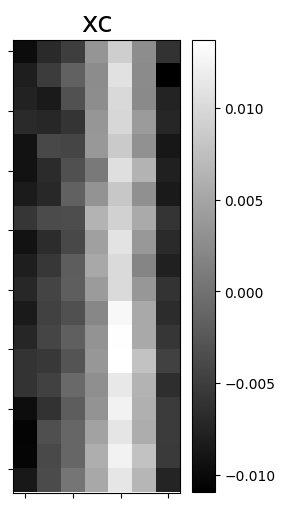

In [73]:
name = "xc"
parMap = np.zeros((19,7))
for i in range(19):
    for j in range(7):
        parMap[i,j] = main_scaled.result[i*7+j].params[name].value
fig, ax = plt.subplots(1,1,figsize=(3,6), dpi=100)
im = ax.imshow(parMap, cmap='gray')
plt.colorbar(im, ax=ax)
ax.set_title(name, fontsize=20)
ax.tick_params(labelleft = "off",labelbottom='off');

print("mean : {}, std : {}".format(parMap.mean(), parMap.std()))
print("initial value : {}".format(main_scaled.result_Mean.params[name].init_value))

mean : 32.19919656053727, std : 1.8424380671482596
initial value : 12.5


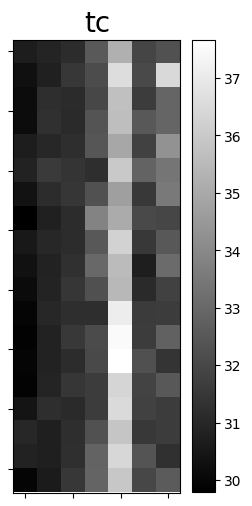

In [74]:
name = "tc"
parMap = np.zeros((19,7))
for i in range(19):
    for j in range(7):
        parMap[i,j] = np.rad2deg(main_scaled.result[i*7+j].params[name].value)
fig, ax = plt.subplots(1,1,figsize=(3,6), dpi=100)
im = ax.imshow(parMap, cmap='gray')
plt.colorbar(im, ax=ax)
ax.set_title(name, fontsize=20)
ax.tick_params(labelleft = "off",labelbottom='off');

print("mean : {}, std : {}".format(parMap.mean(), parMap.std()))
print("initial value : {}".format(np.rad2deg(main_scaled.result_Mean.params[name].init_value)))

mean : -9.110678016851757, std : 17.341108837454225
initial value : 0.0


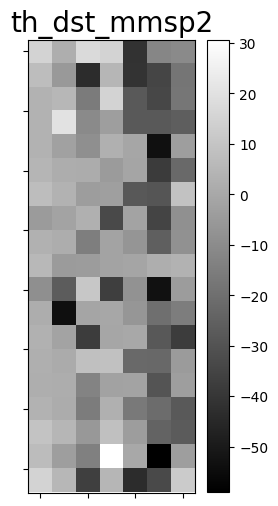

In [75]:
name = "th_dst_mmsp2"
parMap = np.zeros((19,7))
for i in range(19):
    for j in range(7):
        parMap[i,j] = np.rad2deg(main_scaled.result[i*7+j].params[name].value)
fig, ax = plt.subplots(1,1,figsize=(3,6), dpi=100)
im = ax.imshow(parMap, cmap='gray')
plt.colorbar(im, ax=ax)
ax.set_title(name, fontsize=20)
ax.tick_params(labelleft = "off",labelbottom='off');

print("mean : {}, std : {}".format(parMap.mean(), parMap.std()))
print("initial value : {}".format(main_scaled.result_Mean.params[name].init_value))

mean : -60.25738884699984, std : 13.525377901904797
initial value : -42.999999999999986


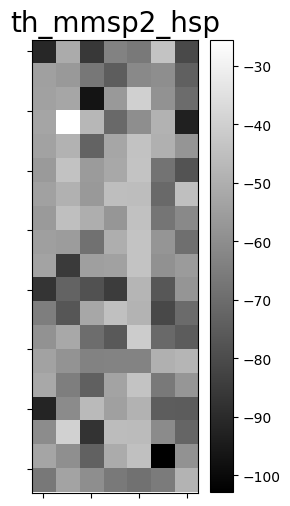

In [77]:
name = "th_mmsp2_hsp"
parMap = np.zeros((19,7))
for i in range(19):
    for j in range(7):
        parMap[i,j] = np.rad2deg(main_scaled.result[i*7+j].params[name].value)
fig, ax = plt.subplots(1,1,figsize=(3,6), dpi=100)
im = ax.imshow(parMap, cmap='gray')
plt.colorbar(im, ax=ax)
ax.set_title(name, fontsize=20)
ax.tick_params(labelleft = "off",labelbottom='off');

print("mean : {}, std : {}".format(parMap.mean(), parMap.std()))
print("initial value : {}".format(np.rad2deg(main_scaled.result_Mean.params[name].init_value)))

mean : 2.73371966671867, std : 2.460402119712896
initial value : 0.0


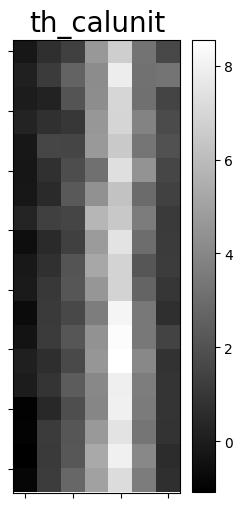

In [78]:
name = "th_calunit"
parMap = np.zeros((19,7))
for i in range(19):
    for j in range(7):
        parMap[i,j] = np.rad2deg(main_scaled.result[i*7+j].params[name].value)
fig, ax = plt.subplots(1,1,figsize=(3,6), dpi=100)
im = ax.imshow(parMap, cmap='gray')
plt.colorbar(im, ax=ax)
ax.set_title(name, fontsize=20)
ax.tick_params(labelleft = "off",labelbottom='off');

print("mean : {}, std : {}".format(parMap.mean(), parMap.std()))
print("initial value : {}".format(np.rad2deg(main_scaled.result_Mean.params[name].init_value)))

mean : -0.6996344326416639, std : 0.24071129012819126
initial value : -0.8551462963121744


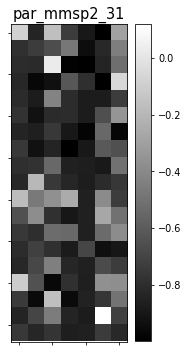

In [98]:
name = "par_mmsp2_31"
parMap = np.zeros((19,7))
for i in range(19):
    for j in range(7):
        parMap[i,j] = main_scaled.result[i*7+j].params[name].value #/ main_scaled.result[i*7+j].params["par_mmsp2_16"].value
fig, ax = plt.subplots(1,1,figsize=(3,6), dpi=70)
im = ax.imshow(parMap, cmap='gray')
plt.colorbar(im, ax=ax)
ax.set_title(name, fontsize=15)
ax.tick_params(labelleft = "off",labelbottom='off');

print("mean : {}, std : {}".format(parMap.mean(), parMap.std()))
print("initial value : {}".format(main_scaled.result_Mean.params[name].init_value))

let's see the initial value of 45 mirror.

In [38]:
for i in range(17,32):
    name = "par_mmsp2_" + str(i)
    print(i, main_scaled.result[0].params[name].init_value )#/ main_scaled.result[0].params["par_mmsp2_16"].init_value)

17 -0.027896655006
18 -0.00278582007812
19 0.0191272293492
20 -0.0345599578073
21 0.986317853211
22 -0.0985713578841
23 0.00230054553836
24 0.00451820863609
25 -0.0932172360477
26 -0.849386601834
27 0.500528790165
28 0.00378542624853
29 -0.0190046942683
30 -0.506516267495
31 -0.855146296312


---

# original image of IQUV

In [3]:
#
from scipy.io import readsav
import matplotlib.patches as patches

In [4]:
#
path = "/nwork/kouui/dstsp/data/calibration/20171128/camera01/cale_iquv0000.sav"
saveFile = readsav(path)

<IPython.core.display.Javascript object>


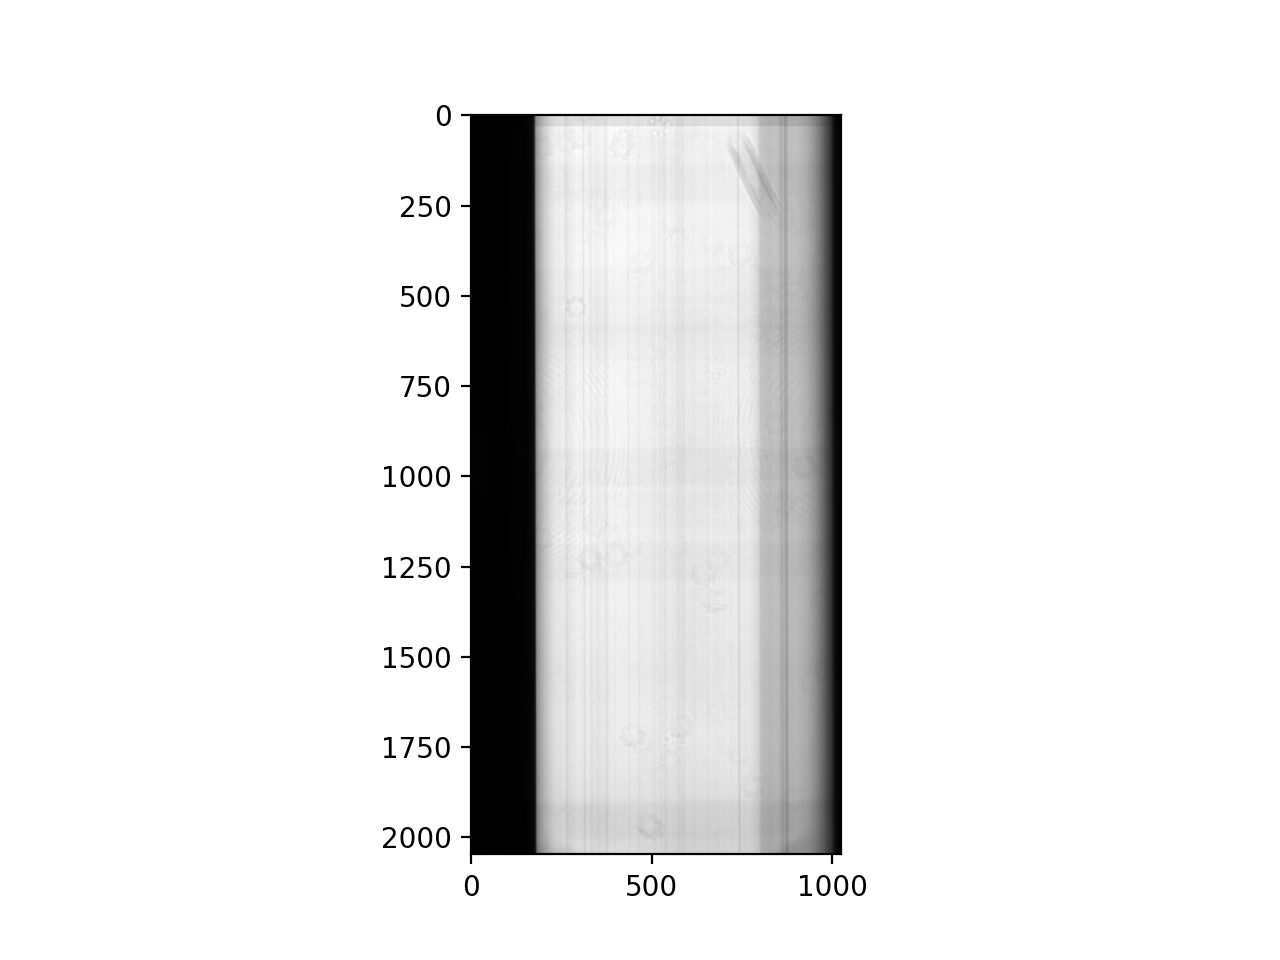

In [6]:
plt.imshow(saveFile['iquv'][10,0,:,:], cmap='gray');

In [120]:
list(map(key2IncidentStokes,key[:99]))

['+U',
 '-Q',
 '-U',
 '+Q',
 '+U',
 '-Q',
 '-U',
 '+Q',
 'I',
 '+U',
 '-Q',
 '-U',
 '+Q',
 '+U',
 '-Q',
 '-U',
 '+Q',
 'I',
 '+U',
 '-Q',
 '-U',
 '+Q',
 '+U',
 '-Q',
 '-U',
 '+Q',
 'I',
 '+U',
 '-Q',
 '-U',
 '+Q',
 '+U',
 '-Q',
 '-U',
 '+Q',
 'I',
 '+U',
 '-Q',
 '-U',
 '+Q',
 '+U',
 '-Q',
 '-U',
 '+Q',
 'I',
 '+U',
 '-Q',
 '-U',
 '+Q',
 '+U',
 '-Q',
 '-U',
 '+Q',
 'I',
 '+U',
 '-Q',
 '-U',
 '+Q',
 '+U',
 '-Q',
 '-U',
 '+Q',
 'I',
 '+U',
 '-Q',
 '-U',
 '+Q',
 '+U',
 '-Q',
 '-U',
 '+Q',
 'I',
 '+U',
 '-Q',
 '-U',
 '+Q',
 '+U',
 '-Q',
 '-U',
 '+Q',
 'I',
 '+U',
 '-Q',
 '-U',
 '+Q',
 '+U',
 '-Q',
 '-U',
 '+Q',
 'I',
 '+U',
 '-Q',
 '-U',
 '+Q',
 '+U',
 '-Q',
 '-U',
 '+Q',
 'I']

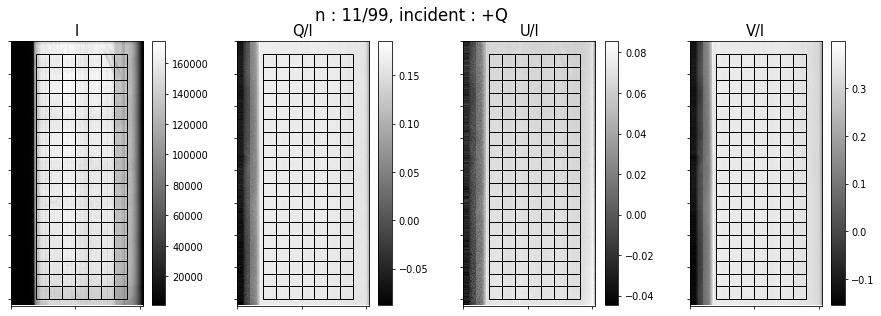

In [128]:
#
batchsize = 100
y_start, x_start = 100,200
y_end, x_end =  2000, 900
nx = int( (x_end-x_start)/batchsize  )
ny = int( (y_end-y_start)/batchsize  )

n = 11   # n< 40

fig, axs = plt.subplots(1,4, figsize=(16,5), dpi=70)
for k,t in zip(range(4),["I","Q/I","U/I","V/I"]):
    ax = axs[k]
    if k == 0:
        im = ax.imshow(saveFile['iquv'][n,0,:,:], cmap='gray')
    else :
        im = ax.imshow(saveFile['iquv'][n,k,:,:]/saveFile['iquv'][35,0,:,:], cmap='gray')
    plt.colorbar(im,ax=ax)
    ax.set_title(t, fontsize=15)
    ax.tick_params(labelleft = "off",labelbottom='off')

incidentStokes = list(map(key2IncidentStokes,key[:99]))
fig.suptitle("n : {}/99, incident : {}".format(n,incidentStokes[n+1]), fontsize=17)

for k in range(4):
    for i in range(ny):
        for j in range(nx):
            axs[k].add_patch( 
                patches.Rectangle(
                (x_start+j*batchsize, y_start+i*batchsize),   # (x,y)
                batchsize,          # width
                batchsize,          # height
                fill=False
            ))


homogeneous

so, the question is what makes the fitted parameters change so rapidly ?